In [1]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
from GISio import shp2df
from GISops import intersect_rtree, project
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
nbshp = '../data/ZillowNeighborhoods-CA/ZillowNeighborhoods-CA.shp'
crimecsv = '../data/Santa_Clara_County_Sheriff_s_Office_2016-2017.csv'

In [5]:
nb_all = shp2df(nbshp)
selected = nb_all.City == 'San Jose'
selected.values


reading ../data/ZillowNeighborhoods-CA/ZillowNeighborhoods-CA.shp...
--> building dataframe... (may take a while for large shapefiles)


array([False,  True, False, ..., False, False, False], dtype=bool)

In [6]:
nb = nb_all.loc[selected].copy()

In [7]:
from shapely.ops import unary_union

In [9]:
extent = unary_union(nb.geometry)

In [12]:
x1, y1, x2, y2 = extent.bounds
x1, y1, x2, y2

(-122.04567199999991, 37.193453, -121.7043589999999, 37.46953800000006)

(-122.04567199999991, -121.7043589999999)

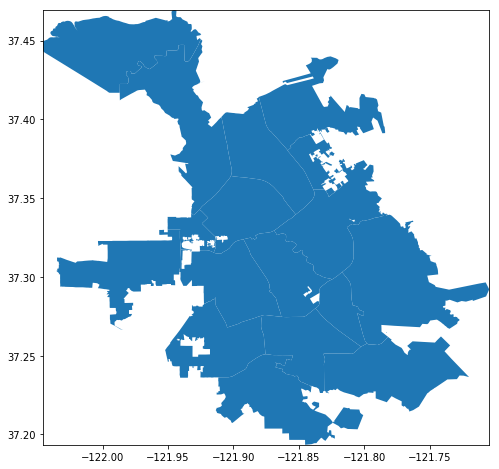

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
cl = PatchCollection([PolygonPatch(p) for p in nb.geometry])
ax.add_collection(cl)
ax.set_ylim(y1, y2)
ax.set_xlim(x1, x2)

In [16]:
import ssl
if hasattr(ssl, '_create_unverified_context'):
    ssl._create_default_https_context = ssl._create_unverified_context

In [21]:
tiles

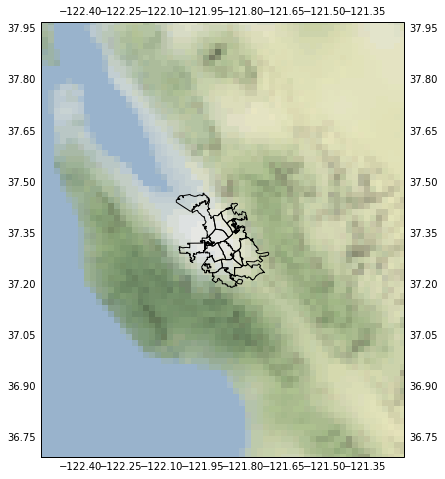

In [23]:
tiles = cimgt.StamenTerrain()
#tiles = cimgt.GoogleTiles()

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=tiles.crs)

pad = 0.5
ax.set_extent([x1-pad, x2+pad, y1-pad, y2+pad])
ax.add_image(tiles, 6)

cl = PatchCollection([PolygonPatch(p) for p in nb.geometry],
                     facecolor='none', edgecolor='k', lw=1,
                     transform=ccrs.PlateCarree())
ax.add_collection(cl)
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False

In [24]:
df = pd.read_csv(crimecsv)
df.index = pd.to_datetime(df.incident_datetime)
df.head()

incident_datetime  incident_id case_number  \
incident_datetime                                                   
2016-06-18 01:50:46  2016-06-18 01:50:46    762597294  S161700025   
2016-06-18 01:55:27  2016-06-18 01:55:27    762597293  S161700026   
2016-06-18 02:07:30  2016-06-18 02:07:30    762597292  S161700027   
2016-06-18 02:08:13  2016-06-18 02:08:13    762597291  S161700028   
2016-06-18 02:11:00  2016-06-18 02:11:00    762597290  S161700029   

                        incident_datetime.1 incident_type_primary  \
incident_datetime                                                   
2016-06-18 01:50:46  06/18/2016 01:50:46 AM       Pedestrian Stop   
2016-06-18 01:55:27  06/18/2016 01:55:27 AM    Community Policing   
2016-06-18 02:07:30  06/18/2016 02:07:30 AM               Traffic   
2016-06-18 02:08:13  06/18/2016 02:08:13 AM                 Other   
2016-06-18 02:11:00  06/18/2016 02:11:00 AM       Pedestrian Stop   

                                                  incident_description  \
incident_datetime                                                        
2016-06-18 01:50:46  Call Type: 1095 <br>Description: PEDESTRIAN ST...   
2016-06-18 01:55:27  Call Type: PATCK <br>Description: PATROL CHECK...   
2016-06-18 02:07:30  Call Type: 23152 <br>Description: MISDEMEANOR ...   
2016-06-18 02:08:13  Call Type: 1154 <br>Description: SUSPICIOUS VE...   
2016-06-18 02:11:00  Call Type: 1095 <br>Description: PEDESTRIAN ST...   

                     clearance_type                 address_1  address_2  \
incident_datetime                                                          
2016-06-18 01:50:46             NaN                W DUNNE AV        NaN   
2016-06-18 01:55:27             NaN                BURNETT AV        NaN   
2016-06-18 02:07:30             NaN            EL CAMINO REAL        NaN   
2016-06-18 02:08:13             NaN  14000 Block PAGE MILL RD        NaN   
2016-06-18 02:11:00             NaN        STEVENS CREEK BLVD        NaN   

                                   city  \
incident_datetime                         
2016-06-18 01:50:46  SANTA CLARA COUNTY   
2016-06-18 01:55:27  SANTA CLARA COUNTY   
2016-06-18 02:07:30  SANTA CLARA COUNTY   
2016-06-18 02:08:13  SANTA CLARA COUNTY   
2016-06-18 02:11:00  SANTA CLARA COUNTY   

                                        ...                     country  \
incident_datetime                       ...                               
2016-06-18 01:50:46                     ...                         NaN   
2016-06-18 01:55:27                     ...                         NaN   
2016-06-18 02:07:30                     ...                         NaN   
2016-06-18 02:08:13                     ...                         NaN   
2016-06-18 02:11:00                     ...                         NaN   

                      latitude   longitude              created_at  \
incident_datetime                                                    
2016-06-18 01:50:46  37.125278 -121.649027  06/19/2016 06:21:04 AM   
2016-06-18 01:55:27  37.163104 -121.661207  06/19/2016 06:21:04 AM   
2016-06-18 02:07:30  37.432465 -122.153537  06/19/2016 06:21:04 AM   
2016-06-18 02:08:13  37.384929 -122.164360  06/19/2016 06:21:04 AM   
2016-06-18 02:11:00  37.322955 -122.022169  06/19/2016 06:21:04 AM   

                                 updated_at  \
incident_datetime                             
2016-06-18 01:50:46  06/25/2016 08:31:26 AM   
2016-06-18 01:55:27  06/25/2016 08:31:26 AM   
2016-06-18 02:07:30  06/25/2016 08:31:26 AM   
2016-06-18 02:08:13  06/25/2016 08:31:27 AM   
2016-06-18 02:11:00  06/25/2016 08:31:27 AM   

                                                       location hour_of_day  \
incident_datetime                                                             
2016-06-18 01:50:46  POINT (-121.649027382508 37.1252776960244)           1   
2016-06-18 01:55:27  POINT (-121.661207382967 37.1631037628581)           1   
2016-06-18 02:07:30  POINT (-122.15353

In [26]:
df.longitude.head()

incident_datetime
2016-06-18 01:50:46   -121.649027
2016-06-18 01:55:27   -121.661207
2016-06-18 02:07:30   -122.153537
2016-06-18 02:08:13   -122.164360
2016-06-18 02:11:00   -122.022169
Name: longitude, dtype: float64

In [27]:
from shapely.geometry import Point

In [28]:
df['geometry'] = [Point(*xy) for xy in zip(df.longitude, df.latitude)]

In [30]:
def bounds(df):
    return df.longitude.min(), df.latitude.min(), df.longitude.max(), df.latitude.max()
xmin, ymin, xmax, ymax = bounds(df)
xmin, ymin, xmax, ymax

(-122.2363548, 36.8415721, -121.21423648053499, 37.532565099999999)

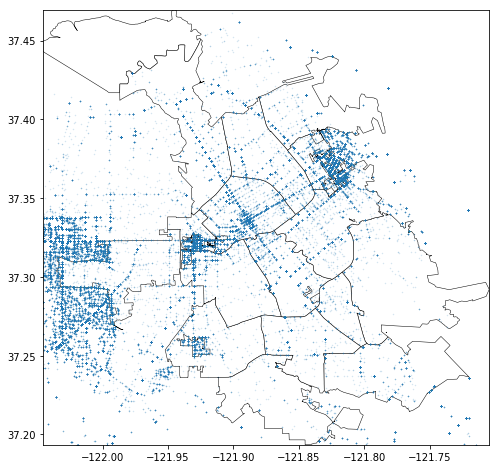

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
cl = PatchCollection([PolygonPatch(p) for p in nb.geometry],
                     facecolor='w', lw=0.5, edgecolor='k')
ax.add_collection(cl)
ax.set_ylim(y1, y2)
ax.set_xlim(x1, x2)
ax.scatter(df.longitude, df.latitude, s=.2, alpha=0.2)

In [32]:
df.dropna(axis=0, subset=['longitude', 'latitude'], inplace=True)

In [35]:
inds = intersect_rtree(df.geometry.tolist(), nb.geometry.tolist())


Building spatial index...
finished in 13.76s

Intersecting 17 features...
17
finished in 62.17s



In [37]:
len(inds)

17

In [41]:
df.iloc[inds[0]].head()

incident_datetime  incident_id case_number  \
incident_datetime                                                   
2017-02-28 15:54:01  2017-02-28 15:54:01    795437391  S170590301   
2016-09-13 20:26:25  2016-09-13 20:26:25    772012061  S162570334   
2017-01-25 08:16:43  2017-01-25 08:16:43    790737544  S170250082   
2016-09-29 02:00:59  2016-09-29 02:00:59    774305204  S162730021   
2017-01-27 18:33:23  2017-01-27 18:33:23    790950767  S170270352   

                        incident_datetime.1 incident_type_primary  \
incident_datetime                                                   
2017-02-28 15:54:01  02/28/2017 03:54:01 PM    Community Policing   
2016-09-13 20:26:25  09/13/2016 08:26:25 PM    Community Policing   
2017-01-25 08:16:43  01/25/2017 08:16:43 AM    Community Policing   
2016-09-29 02:00:59  09/29/2016 02:00:59 AM              Disorder   
2017-01-27 18:33:23  01/27/2017 06:33:23 PM    Community Policing   

                                                  incident_description  \
incident_datetime                                                        
2017-02-28 15:54:01  Call Type: PATCK <br>Description: PATROL CHECK...   
2016-09-13 20:26:25  Call Type: PATCK <br>Description: PATROL CHECK...   
2017-01-25 08:16:43  Call Type: FOOT <br>Description: FOOT PATROL<b...   
2016-09-29 02:00:59  Call Type: 415J <br>Description: DISTURBANCE, ...   
2017-01-27 18:33:23  Call Type: PATCK <br>Description: PATROL CHECK...   

                     clearance_type              address_1  address_2  \
incident_datetime                                                       
2017-02-28 15:54:01             NaN  1 Block BLOCK HOPE ST        NaN   
2016-09-13 20:26:25             NaN  1 Block BLOCK HOPE ST        NaN   
2017-01-25 08:16:43             NaN  1 Block BLOCK HOPE ST        NaN   
2016-09-29 02:00:59             NaN  1 Block BLOCK HOPE ST        NaN   
2017-01-27 18:33:23             NaN  1 Block BLOCK HOPE ST        NaN   

                                   city  \
incident_datetime                         
2017-02-28 15:54:01  SANTA CLARA COUNTY   
2016-09-13 20:26:25  SANTA CLARA COUNTY   
2017-01-25 08:16:43  SANTA CLARA COUNTY   
2016-09-29 02:00:59  SANTA CLARA COUNTY   
2017-01-27 18:33:23  SANTA CLARA COUNTY   

                                       ...                    country  \
incident_datetime                      ...                              
2017-02-28 15:54:01                    ...                        NaN   
2016-09-13 20:26:25                    ...                        NaN   
2017-01-25 08:16:43                    ...                        NaN   
2016-09-29 02:00:59                    ...                        NaN   
2017-01-27 18:33:23                    ...                        NaN   

                      latitude   longitude              created_at  \
incident_datetime                                                    
2017-02-28 15:54:01  37.429252 -121.977839  03/01/2017 09:29:45 AM   
2016-09-13 20:26:25  37.429252 -121.977839  09/14/2016 06:32:51 AM   
2017-01-25 08:16:43  37.429252 -121.977839  01/26/2017 07:34:34 AM   
2016-09-29 02:00:59  37.429252 -121.977839  09/30/2016 06:32:09 AM   
2017-01-27 18:33:23  37.429252 -121.977839  01/28/2017 07:34:31 AM   

                                 updated_at  \
incident_datetime                             
2017-02-28 15:54:01  03/07/2017 09:30:56 AM   
2016-09-13 20:26:25  09/21/2016 06:48:43 AM   
2017-01-25 08:16:43  02/01/2017 09:34:40 AM   
2016-09-29 02:00:59  10/06/2016 08:37:27 AM   
2017-01-27 18:33:23  02/01/2017 09:36:23 AM   

                                                     location hour_of_day  \
incident_datetime                                                           
2017-02-28 15:54:01  POINT (-121.97783944457 37.429252099531)          15   
2016-09-13 20:26:25  POINT (-121.97783944457 37.429252099531)          20   
2017-01-25 08:16:43  POINT (-121.97783944457 37.429252099531)           8   
2016

In [44]:
nb['n_incidents'] = [len(n) for n in inds]
nb.head()

State       County      City           Name RegionID  \
1      CA  Santa Clara  San Jose         Alviso     8075   
22     CA  Santa Clara  San Jose  Cambrian Park   114074   
68     CA  Santa Clara  San Jose      Berryessa   113736   
74     CA  Santa Clara  San Jose      Evergreen   115003   
213    CA  Santa Clara  San Jose    Willow Glen   118987   

                                              geometry  n_incidents  
1    POLYGON ((-121.9423569999999 37.46496300000007...          324  
22   POLYGON ((-121.878978755 37.27530488000008, -1...         1242  
68   POLYGON ((-121.8202519999999 37.43812700000007...         1373  
74   (POLYGON ((-121.7826669999999 37.2649340000000...          513  
213  POLYGON ((-121.8874382369999 37.31590445900008...         4255

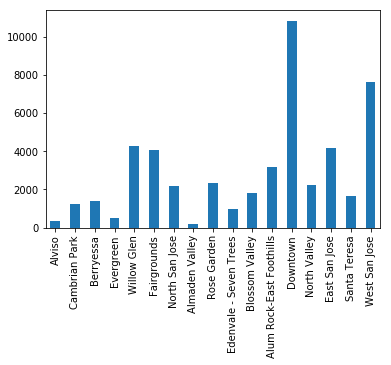

In [47]:
ax = nb.n_incidents.plot(kind='bar')
ticks = ax.set_xticklabels(nb.Name)

In [48]:
neighborhoods = np.array([''] * len(df), dtype=np.object)
neighborhoods

array(['', '', '', ..., '', '', ''], dtype=object)

In [50]:
for i, n in enumerate(nb.Name):
    neighborhoods[np.array(inds[i])] = n
neighborhoods

array(['', '', '', ..., '', '', ''], dtype=object)

In [52]:
np.array(inds[i])

array([157520, 157594, 159188, ...,  15344,  16572,    354])

In [54]:
df['neighborhood'] = neighborhoods

In [56]:
np.unique(neighborhoods)

array(['', 'Almaden Valley', 'Alum Rock-East Foothills', 'Alviso',
       'Berryessa', 'Blossom Valley', 'Cambrian Park', 'Downtown',
       'East San Jose', 'Edenvale - Seven Trees', 'Evergreen',
       'Fairgrounds', 'North San Jose', 'North Valley', 'Rose Garden',
       'Santa Teresa', 'West San Jose', 'Willow Glen'], dtype=object)

In [58]:
df.incident_type_primary.unique()

array(['Pedestrian Stop', 'Community Policing', 'Traffic', 'Other',
       'Vehicle Stop', 'Alarm', 'Disorder', 'Missing Person', 'Drugs',
       'Theft', 'Breaking & Entering', 'Family Offense',
       'Theft from Vehicle', 'Assault', 'Property Crime', 'Robbery',
       'Death', 'Theft of Vehicle', 'Weapons Offense',
       'Other Sexual Offense', 'Vehicle Recovery',
       'Assault with Deadly Weapon', 'Liquor', 'Arson', 'Kidnapping',
       'Sexual Assault', 'Homicide'], dtype=object)

In [64]:
counts = df.loc[df.incident_type_primary == 'Theft of Vehicle'].\
groupby('neighborhood').count().incident_type_primary
counts.sort_values(ascending=False)

neighborhood
                            643
Willow Glen                  59
Alum Rock-East Foothills     36
Fairgrounds                  35
East San Jose                35
Rose Garden                  31
Downtown                     24
Blossom Valley               21
Santa Teresa                 16
North Valley                 16
West San Jose                16
Cambrian Park                13
Edenvale - Seven Trees       12
Berryessa                     6
North San Jose                2
Evergreen                     2
Almaden Valley                1
Name: incident_type_primary, dtype: int64

In [62]:
dtwn = df.loc[df.neighborhood == 'Downtown']

In [67]:
dtwn.groupby('incident_type_primary').count().incident_id.sort_values(ascending=False)

incident_type_primary
Other                         2547
Pedestrian Stop               2065
Vehicle Stop                  1994
Community Policing             978
Disorder                       798
Alarm                          646
Assault                        473
Traffic                        318
Property Crime                 240
Missing Person                 151
Vehicle Recovery               112
Theft                           98
Other Sexual Offense            92
Drugs                           82
Weapons Offense                 47
Death                           44
Sexual Assault                  42
Robbery                         30
Theft of Vehicle                24
Assault with Deadly Weapon      23
Family Offense                  15
Theft from Vehicle               6
Breaking & Entering              6
Homicide                         2
Kidnapping                       1
Arson                            1
Name: incident_id, dtype: int64

In [72]:
from rtree import index
import time

In [69]:
points = list(zip(df.longitude, df.latitude, df.longitude, df.latitude))

In [70]:
points[0]

(-121.649027382508, 37.125277696024398, -121.649027382508, 37.125277696024398)

In [75]:
ta = time.time()
idx = index.Index()
for i, p in enumerate(points):
    idx.insert(i, p)
print("finished in {:.2f}".format(time.time() -ta))

finished in 10.64


In [76]:
x, y = -122.171302, 37.456697

In [79]:
nearest = list(idx.nearest((x, y, x, y), 500))
len(nearest)

514

In [80]:
dfn = df.iloc[nearest]

In [82]:
import folium
from folium.plugins import MarkerCluster

In [95]:
locations = list(zip(df.latitude.values, df.longitude.values))
popups = ['{}'.format(i) for i in df.incident_description]
startx, starty = df.longitude.mean(), df.latitude.mean()

In [96]:
popups[0]

'Call Type: 1095 <br>Description: PEDESTRIAN STOP<br>Final Disposition: N'

In [ ]:
url = 'http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/'
url += 'tile/{z}/{y}/{x}.png'

m = folium.Map(location=[starty, startx], zoom_start=12,
              tiles=url,
              attr='ESRI Aerial')
folium.Marker([y, x], popup='USGS').add_to(m)
m.add_child(MarkerCluster(locations=locations, popups=popups))
m.save('junk/allpoints.html')

In [ ]:
m